In [1]:
from src.drugexr.data_structs.vocabulary import Vocabulary
from src.drugexr.models.generator import Generator
from src.drugexr.config import constants as c
from torch.utils.data import DataLoader

import torch
import pandas as pd

In [7]:
vocabulary = Vocabulary(vocabulary_path=c.PROC_DATA_PATH / "chembl_voc.txt")
generator = Generator(vocabulary=vocabulary)
generator.load_from_checkpoint(c.MODEL_PATH / "output/rnn/lstm_chembl_lightning_999.ckpt", vocabulary=vocabulary)

encoded_samples = generator.sample(1000)
decoded_samples = [vocabulary.decode(sample) for sample in encoded_samples]

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [8]:
mols = [Chem.MolFromSmiles(mol) for mol in decoded_samples]

In [11]:
valid_mols = [mol for mol in mols if mol]

In [26]:
smiles = [Chem.MolToSmiles(mol) for mol in valid_mols]

In [28]:
smiles[17]

'[B][BH2-][BH2-][CH]'

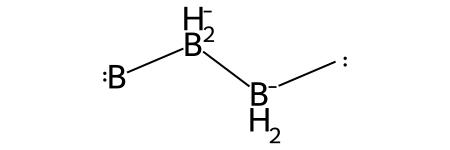

In [29]:
valid_mols[17]